# <center>Advanced Operations, Detecting Faces and Features</center>

# libraries

In [1]:
from skimage import color, data, filters , measure
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
def plot_comparison(original, filtered, title_filtered,title_original='original'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10), sharex=True,
    sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title(title_original)
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

In [4]:
def plot_contrast(org_image,eq_image):
    fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(8, 8))
    ax[0,0].imshow(org_image,cmap=plt.cm.gray)
    ax[0,0].set_title('original')
    ax[0,0].axis('off')

    ax[0,1].hist(org_image.ravel(), bins=256)
    ax[0,1].set_title('Histogram of image')


    # Show the resulting image
    ax[1,0].imshow(eq_image,cmap=plt.cm.gray)
    ax[1,0].set_title('after costrast by equalization')
    ax[1,0].axis('off')

    ax[1,1].hist(eq_image.ravel(), bins=256)
    ax[1,1].set_title('Equalization Histogram')

In [5]:
def show_image_contour(image, contours):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 8))
    ax1.imshow(image, cmap='gray_r')
    ax1.set_title('original')
    ax1.axis('off')
    
    for n, contour in enumerate(contours):
        ax2.plot(contour[:, 1], contour[:, 0], linewidth=3)
    ax2.imshow(image, interpolation='nearest', cmap='gray_r')
    ax2.set_title('Contours')
    ax2.axis('off')

In [6]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r')
    plt.axis('off')
    plt.show()

In [7]:
import matplotlib.patches as patches

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        print(d)
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)

# Edge Detection (Canny)

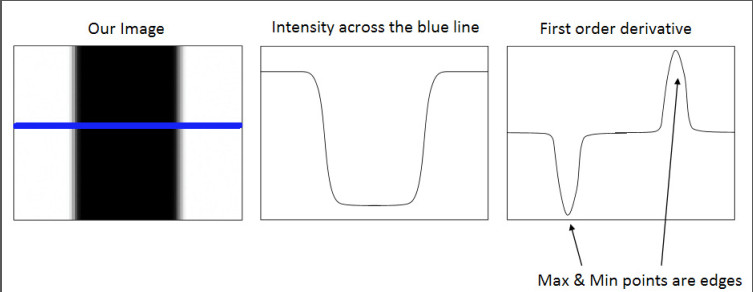

- Edges can be defined as **sudden changes (discontinuities) in an image** and they can encode just as much information as pixels.


- **There are three main types of Edge Detection:**
    1. Sobel – to emphasize vertical or horizontal edges
    2. Laplacian – Gets all orientations
    3. Canny – Optimal due to low error rate, well defined edges and accurate detection.


- **Canny Edge Detection Algorithm (developed by John F. Canny in 1986)**
    1. Applies Gaussian blurring
    2. Finds intensity gradient of the image
    3. Applied non-maximum suppression (i.e. removes pixels that are not edges)
    4. Hysteresis – Applies thresholds (i.e. if pixel is within the upper and lowerthresholds, it is considered an edge)
    
    
- you have seen before how to detect edges using the Sobel filtering technique.
- The Canny edge detection is widely considered to be the standard edge detection method in image processing.
- It produces higher accuracy detecting edges and less execution time compared with Sobel algorithm.
- Must convert to grayscale, Then we apply the canny detector on the  image and obtain the resulting image.
- The first step of this algorithm is to apply a **gaussian filter in order to remove noise** in the image.
- So, in the canny function you can optionally set the intensity of this Gaussian filter to be applied in the image, by using the sigma attribute.
- The **lower** the value of this **sigma**, the **less of gaussian filter effect** is applied on the image, so it will spot **more edges**.
- On the other hand, if you set a higher value, more noise will be removed and the result is going to be a less edgy image.
- The default value of this parameter is 1.
- When setting it to 0.5, The resulting image has a lot more edges than the previous one and this is because noise was removed.

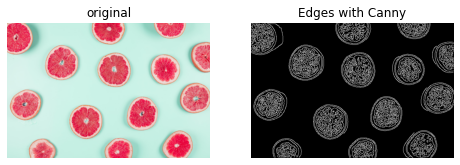

In [44]:
grape_fruit=plt.imread('./images/chapter4/grapefruit.jpg')

# Import the canny edge detector 
from skimage.feature import canny

# Convert image to grayscale
grapefruit = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image
plot_comparison(grape_fruit,canny_edges, "Edges with Canny")

- **Less edges** by applying a more intense Gaussian filter to first make the image smoother.
- This can be achieved by specifying a **bigger sigma** in the canny function.

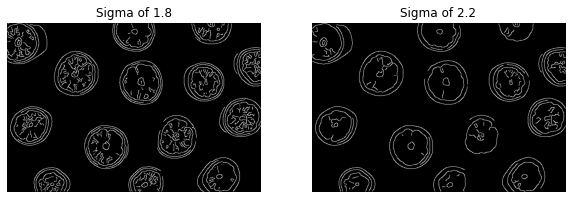

In [52]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
plot_comparison(edges_1_8,edges_2_2, "Sigma of 2.2","Sigma of 1.8")

# Corner Detection

- Corner detection is an approach used to extract certain types of features and infer the contents of an image.
- corner can be defined as the intersection of two edges. Intuitively, it can also be a junction of contours.
- It's frequently used in motion detection, image registration, video tracking, panorama stitching, 3D modelling, and object recognition. 


- **Points of interest**
    - Features are the points of interest which provide rich image content information.
    - Points of interest are points in the image which are invariant to rotation, translation, intensity, and scale changes. (Basically, robust and reliable).
    - There are different interest points such as corners and edges.


- **Matching corners**
    - So by detecting corners as interest points, we can match objects from different perspectives.
    - where we detect the corners of the original image and then match them in a downscaled image or match them in a rotated image.

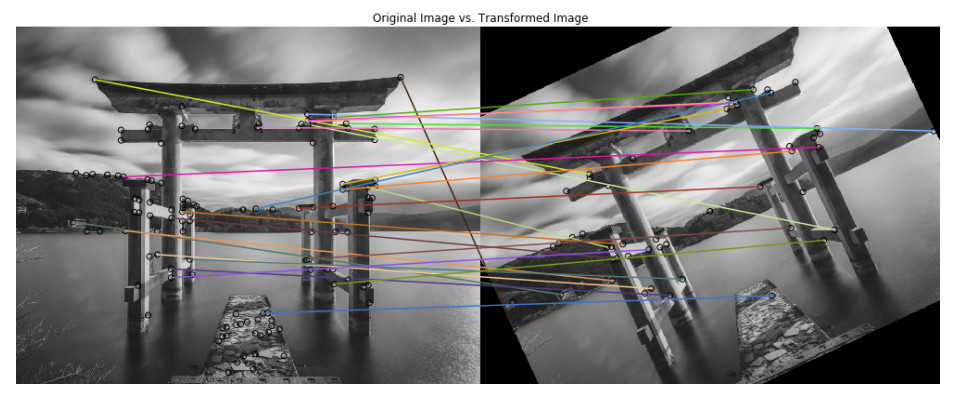

## Harris corner detector

- Harris Corner Detector is a corner detection operator that is widely used in computer vision algorithms.
- Here, we use this image of a Japanese gate to work with the Harris detector.
- This function requires grayscale images, so we need to first convert the image from rgb to gray. 

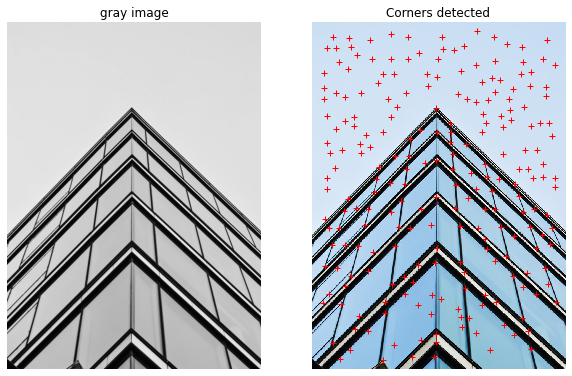

In [64]:
building_image=plt.imread('./images/chapter4/corners_building.jpg')

# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords =corner_peaks(measure_image,min_distance=20)

# Show original and resulting image with corners detected

plot_comparison(building_image_gray,measure_image,
                "Harris detector","gray image")

show_image_with_corners(building_image, coords)

- **Less corners**, when you set the minimum distance between corner peaks to be a higher number.

With a min_distance set to 2, we detect a total 227 corners in the image.
With a min_distance set to 40, we detect a total 23 corners in the image.


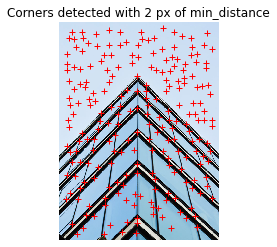

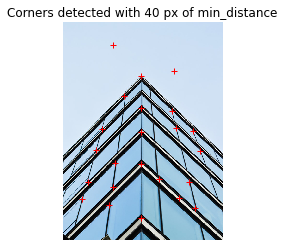

In [65]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_20 = corner_peaks(measure_image, min_distance=20)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_20), "corners in the image.")

# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=60)
print("With a min_distance set to 40, we detect a total", len(coords_w_min_40), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_20 , "Corners detected with 2 px of min_distance")
show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

# Face detection
- we won't cover machine learning concepts in depth, but it's important to know that we use a cascade of classifiers, which is like multiple classifiers in one. You can also use it for other things, like cats, objects, or profile faces, from a side view.


- **detect_multi_scale method**
    - To apply the detector on images, we need to use the detect_multi_scale method, from the same cascade class.
    - This method searches for the object, in this case a face. It creates a window that will be moving through the image until it finds something similar to a human face.
    - Searching happens on multiple scales. The window will have a minimum size, to spot the small or far-away faces. And a maximum size to also find the larger faces in the image.

- **its parameters**
    - a scale factor, by which the searching window is multiplied in each step.
    - a step ratio, Usually, values in the interval 1 to 1.5 give good results.
    - the minimum and maximum window size , These specify the interval for the search windows that are applied to the input image to detect the faces.


- The detector will return the coordinates of the box that contains the face as a dictionary, 
    - where r represents the row position of the top left corner of the detected window,
    - c is the column position pixel,
    - width is width and height of detected window.

## Is someone there?
we will check whether or not there is a person present in an image taken at night.

In [70]:
from skimage.feature import Cascade

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

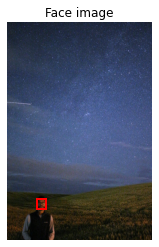

{'r': 774, 'c': 131, 'width': 40, 'height': 40}


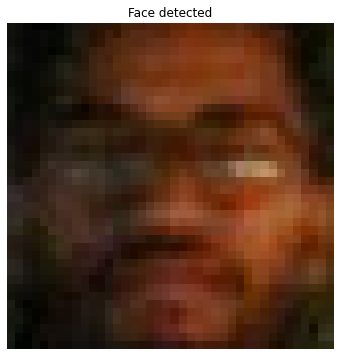

In [71]:
night_image=plt.imread('./images/chapter4/face_night.jpg')

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

# Show the detected faces
show_detected_face(night_image, detected)

## Detect multiple faces

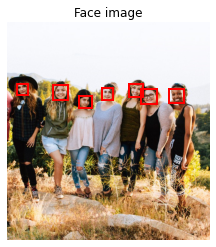

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


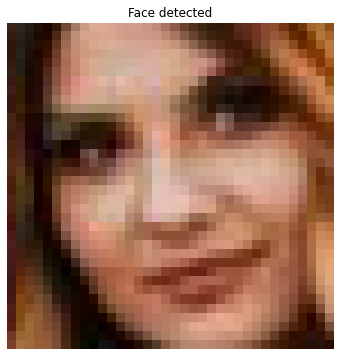

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


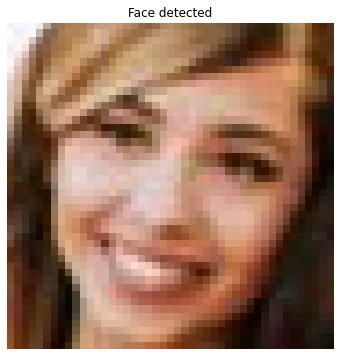

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


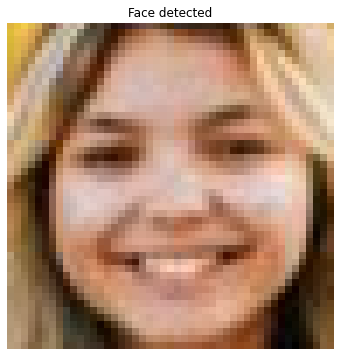

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


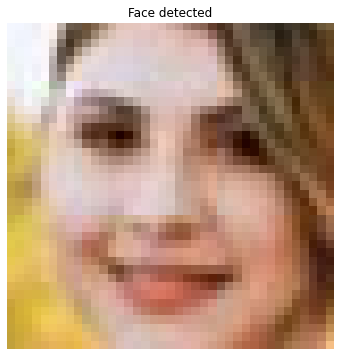

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


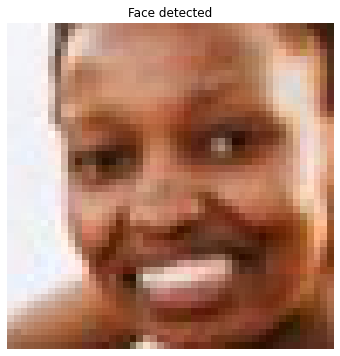

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


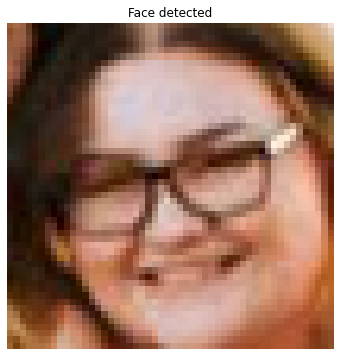

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


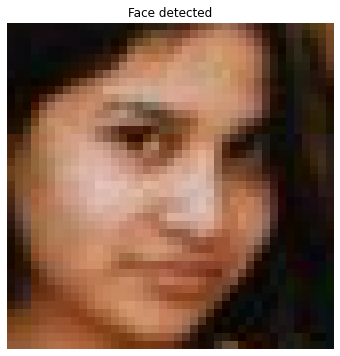

In [72]:
friends_image=plt.imread('./images/chapter4/friends.jpg')

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

## Segmentation and face detection

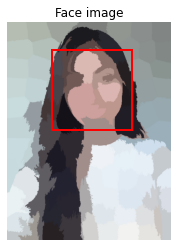

{'r': 113, 'c': 182, 'width': 322, 'height': 322}


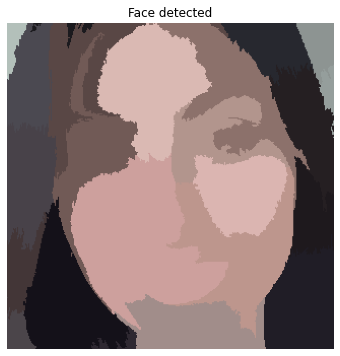

In [75]:
profile_image=plt.imread('./images/chapter4/face.jpg')

# Obtain the segmentation with default 100 regions
segments =slic(profile_image, n_segments= 100)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments,profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image.astype('uint8'), detected)

## blurring faces

blurring faces forPrivacy protection,So we'll first need to detect faces, using the cascade of classifiers detector and then apply a gaussian filter to the cropped faces.

In [12]:
def getFaceRectangle(image, d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face= image[ x:width, y:height]
    return face

def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    original[ x:width, y:height] = gaussian_image
    return original

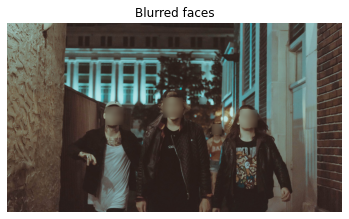

In [17]:
group_image=plt.imread('./images/chapter4/group.jpg')

from skimage.feature import Cascade
from skimage.filters import gaussian
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect the faces
detected = detector.detect_multi_scale(img=group_image, 
                                       scale_factor=1.2, step_ratio=1, 
                                       min_size=(10,10), max_size=(100, 100))
# For each detected face
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFaceRectangle(group_image,d)
    
    # Apply gaussian filter to extracted face
    blurred_face =gaussian(face, multichannel=True, sigma = 10, preserve_range=True)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(group_image, blurred_face) 
show_image(resulting_image, "Blurred faces")